## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [65]:
! git clone https://github.com/bwillow1222/kmc

fatal: destination path 'kmc' already exists and is not an empty directory.


In [87]:
import pandas as pd
import numpy as np

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.


In [67]:
df = pd.read_csv('/content/kmc/data/airbnb_hw.csv')

# Make a df of variables of interest
X = df.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

# Print summary stats of new df
print(X.shape)
X.describe()

(30478, 4)


,Beds,Number Of Reviews,Review Scores Rating
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [68]:
# Clean Price
X['Price'] = X['Price'].str.replace(',','')
X['Price'] = pd.to_numeric(X['Price'],errors='coerce')

In [69]:
# Clean Beds
X['Beds'].unique()

array([ 1.,  3.,  2.,  4.,  5., nan,  6., 10.,  7.,  8., 12.,  0., 16.,
        9., 11.])

In [70]:
# Since there a missing values for beds, we are going to assume
# that there is 1 bed on the property
X['Beds'] = X['Beds'].fillna(1)

In [71]:
# Clean Number Of Reviews
X['Number Of Reviews'].unique()
X['Number Of Reviews'].value_counts()


0      7814
1      3572
2      2457
3      1764
4      1382
       ... 
216       1
191       1
213       1
178       1
130       1
Name: Number Of Reviews, Length: 205, dtype: int64

In [72]:
# Clean Review Scores Rating
X['Review Scores Rating'].unique()

array([ nan,  96., 100.,  94.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,
        85.,  86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,
        83.,  66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,
        71.,  75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,
        58.,  43.,  63.,  55.,  47.,  53.,  49.,  30.])

In [73]:
# Don't want properties with missing review or scores so drop them
X = X.dropna()
X.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).


In [77]:
def maxmin(x):
    u = (x-min(x))/(max(x)-min(x))
    return u

X2 = X.drop('Price', axis=1)
X2 = X2.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.


In [78]:
from sklearn.cluster import KMeans # Import kmc
import matplotlib.pyplot as plt


model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(X2) # Fit the emodel
X2['cluster'] = model.labels_

In [79]:
X2.describe()

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,2.040081
std,0.065205,0.094954,0.110630,1.473279
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,1.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.


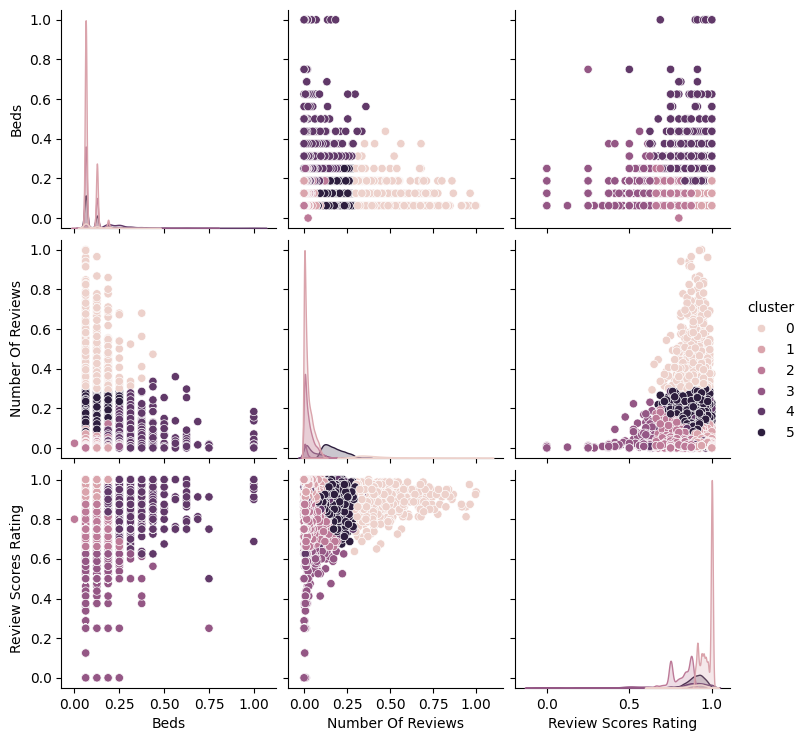

In [85]:
import seaborn as sns
sns.pairplot(data=X2,hue='cluster')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?


In [84]:
X['cluster'] = model.labels_
X.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                              
           count        mean         std   min     25%    50%     75%      max
cluster                                                                       
0          794.0  133.238035   83.077776  27.0   80.00  110.0  168.50    875.0
1        10512.0  152.233352  147.281729  10.0   85.00  130.0  190.00  10000.0
2         5554.0  131.496579  102.621585  20.0   75.00  110.0  169.00   5000.0
3          632.0  133.587025  215.505565  25.0   65.00   99.0  151.25   5000.0
4         1633.0  293.458665  262.439199  27.0  150.00  229.0  350.00   4500.0
5         3030.0  141.674917   84.134011  22.0   87.25  125.0  175.00   1000.0

Cluster 4 seems to have the highest rental prices by far with properties averaging about 300 dollars per night compared to other clusters that are about 140 dollars per night. It also important to note that outliers are probably note the cause of a higher avg price in cluster 4 because the 25%, 50%, and 75% percentiles are all greater than the other clusters.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree Plot')

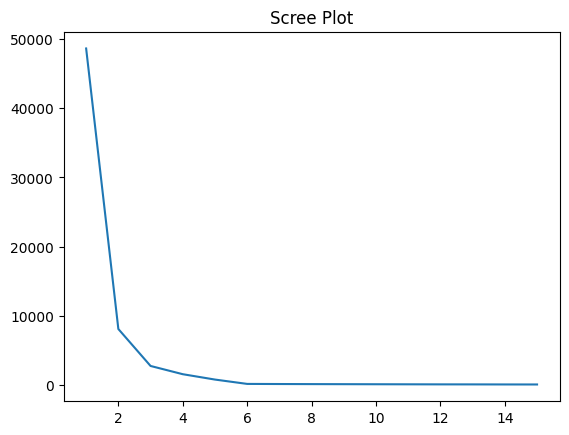

In [89]:
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(X2) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

A k value of 3 looks optimal because it is the 'elbow point' where SSE is still significantly reduced.

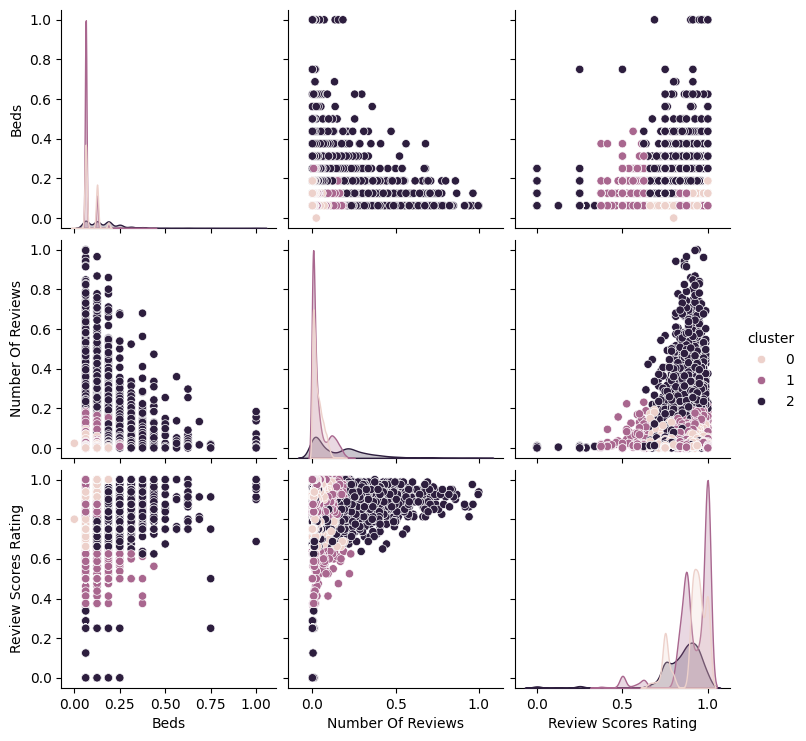

In [95]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0) # Create a model for
model = model.fit(X2) # Fit the emodel
X2['cluster'] = model.labels_

sns.pairplot(data=X2,hue='cluster')

In [96]:
X['cluster'] = model.labels_
X.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0         7372.0  154.825421  161.259903  20.0  85.0  130.0  195.0  10000.0
1        10129.0  134.139500   89.297335  10.0  79.0  118.0  170.0   3500.0
2         4654.0  199.666523  209.708951  27.0  99.0  150.0  235.0   5000.0

Cluster 2 has the highest average rental price at 200 dollars per night which is about 33% greater than cluster 0's 155 dollars per night. Cluster 1 has the lowest average rental price at 134 dollars per night. Some interesting trends: cluster 2 has considerably more reviews than the other clusters and those reviews tend to have higher scores. This suggests that those higher prices are justifies because those properties consistenly deliver higher-quality experiences compared to the other clusters.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [97]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


<Axes: xlabel='x1', ylabel='x2'>

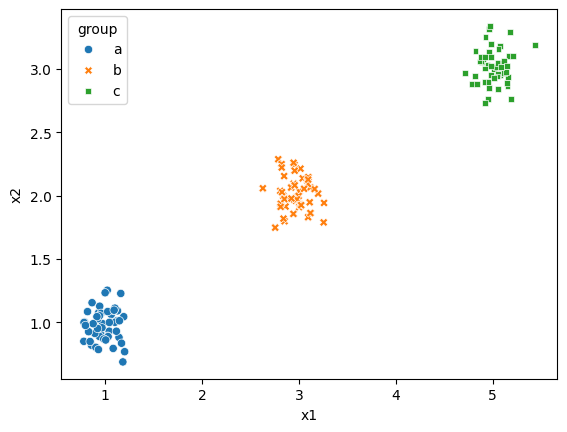

In [99]:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

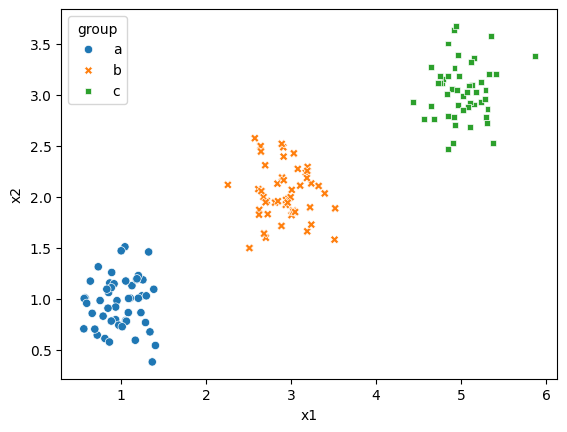

In [100]:
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

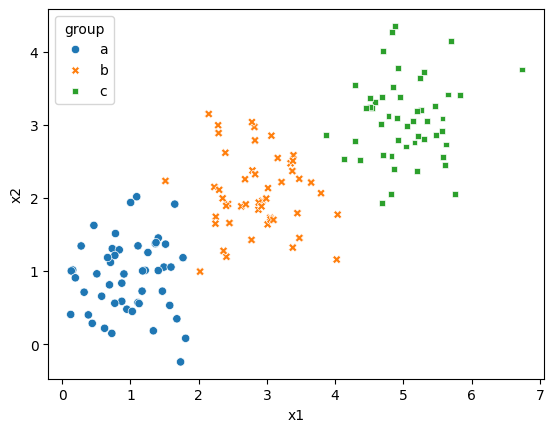

In [101]:
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

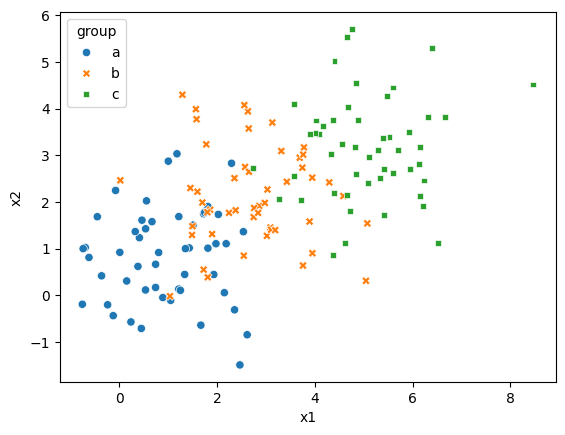

In [102]:
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

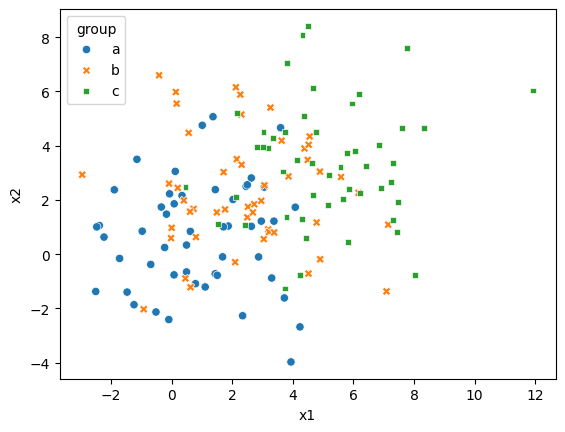

In [103]:
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

As the noise increase, the clusters become less and less distinguishable from each other

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.


In [106]:
# Since we have to create multiple scree plots, let's streamline the process by creating a scree plot function
def scree(df):
    X = df.loc[ : , ['x1','x2'] ] # Select data to cluster
    X = X.apply(maxmin) # Normalize the data

    k_bar = 15
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot') # Create scree plot

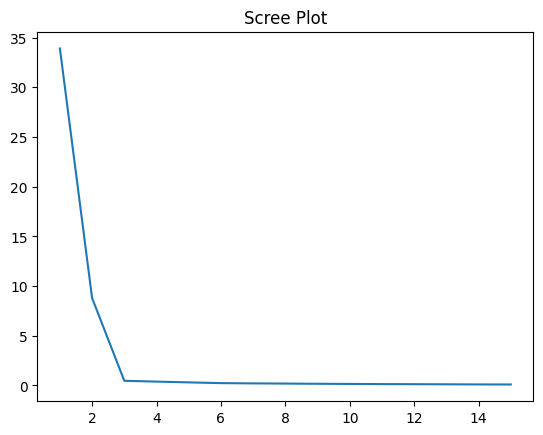

In [109]:
scree(df0_125)

Clear elbow at k=3

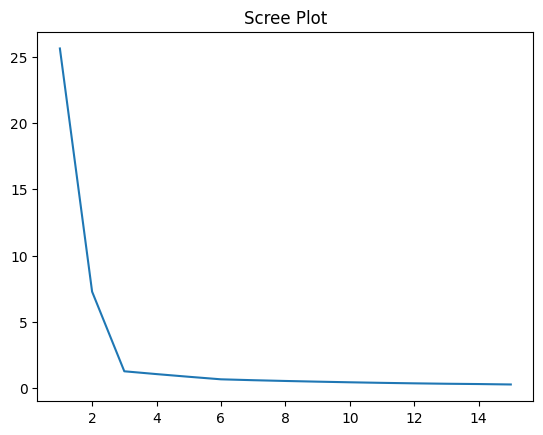

In [110]:
scree(df0_25)

Clear elbow at k=3

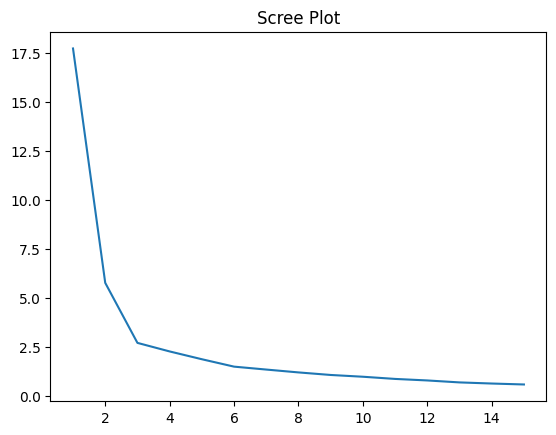

In [111]:
scree(df0_5)

Less obvious elbow at k=3

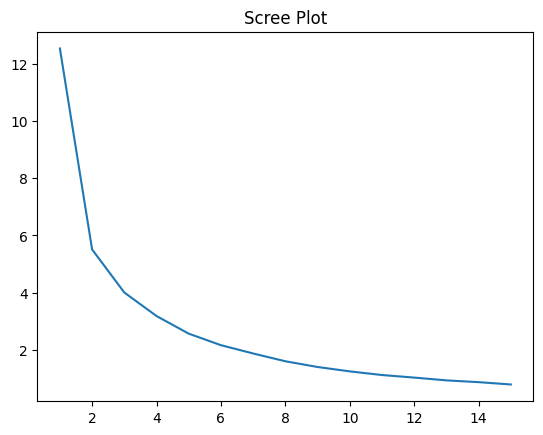

In [112]:
scree(df1_0)

Likely an elbow at k=2

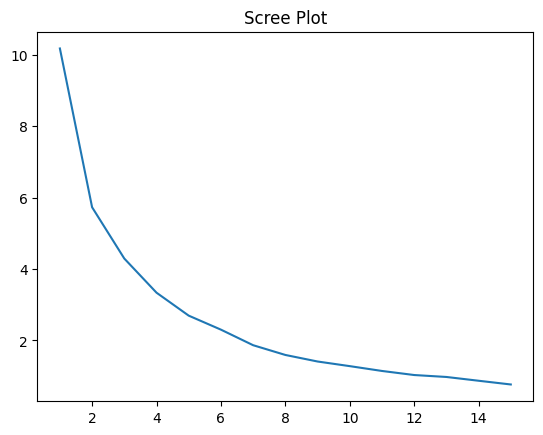

In [113]:
scree(df2_0)

No obvious elbow

4. Explain the intuition of the elbow, using this numerical simulation as an example.

When the clusters are distinct, there is a large marginal benefit to adding an extra cluster because the SSE is significantly reduced, creating that elbow shape in the scree plot. When there are too many clusters or the clusters aren't clearly defined, the concave behavior of scree plot smoothes because increasing k doesn't significantly reduce SSE.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?